<a href="https://colab.research.google.com/github/Alexcon19/Modelo-IA-Selecci-n-Fibra/blob/main/Copia_de_Recomendaci%C3%B3nfibra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries and functions

In [6]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

## Data handling


In [9]:
path = '/content/sample_data/Setdefibrafinal.xlsx'
df = pd.read_excel(path)

In [10]:
df.head()

,Fiber,Density (gm/cc),Cellulose (wt%),Hemicellulose (wt%),Lignin (wt%),Moisture content (wt%),IndiceTSD
0,Cissus quadrangularis stem,1.220,82.73,7.96,11.27,6.60,3188.114754
1,Cissus quadrangularis root,1.510,77.17,11.02,10.45,7.30,2379.801325
2,Tamarindus Indica L. (fruit fiber),1.145,72.84,11.00,15.38,6.35,1090.393013
3,Cyperus Dichrostachus A.Rich,1.010,NaN,NaN,NaN,NaN,942.415842
4,Furcraea foetida,0.778,68.35,11.46,12.32,5.43,801.439589


In [11]:
# create a dictionary of old column names and new column names
new_column_names = {'Density (gm/cc)': 'Density',
                    'Cellulose (wt%)': 'Cellulose',
                    'Hemicellulose (wt%)': 'Hemicellulose',
                    'Lignin (wt%)': 'Lignin',
                    'Moisture content (wt%)': 'Moisture_content',
                    'IndiceTSD': 'Indice'}

# use the pandas rename() function to rename the column names
df.rename(columns=new_column_names, inplace=True)
df.head()

,Fiber,Density,Cellulose,Hemicellulose,Lignin,Moisture_content,Indice
0,Cissus quadrangularis stem,1.220,82.73,7.96,11.27,6.60,3188.114754
1,Cissus quadrangularis root,1.510,77.17,11.02,10.45,7.30,2379.801325
2,Tamarindus Indica L. (fruit fiber),1.145,72.84,11.00,15.38,6.35,1090.393013
3,Cyperus Dichrostachus A.Rich,1.010,NaN,NaN,NaN,NaN,942.415842
4,Furcraea foetida,0.778,68.35,11.46,12.32,5.43,801.439589


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fiber             53 non-null     object 
 1   Density           53 non-null     float64
 2   Cellulose         36 non-null     float64
 3   Hemicellulose     34 non-null     float64
 4   Lignin            36 non-null     float64
 5   Moisture_content  34 non-null     float64
 6   Indice            53 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


In [13]:
# Generate descriptive statistics
df.describe()

,Density,Cellulose,Hemicellulose,Lignin,Moisture_content,Indice
count,53.000000,36.000000,34.000000,36.000000,34.000000,53.000000
mean,1.201166,63.665278,15.209853,14.010972,10.911618,458.729600
std,0.274475,15.123091,6.874796,10.739737,7.880750,523.657088
min,0.385000,31.600000,0.300000,0.800000,1.000000,19.285714
25%,0.975000,54.725000,11.005000,7.222500,8.010000,183.750000
50%,1.270000,65.250000,14.650000,11.795000,9.490000,374.827586
75%,1.400000,75.217500,18.728750,18.045000,10.997500,509.578254
max,1.545000,87.500000,30.000000,48.400000,50.000000,3188.114754


## Handling missed data

In [ ]:
df.isnull().sum()

Fiber                0
Density              0
Cellulose           17
Hemicellulose       19
Lignin              17
Moisture_content    19
Indice               0
dtype: int64

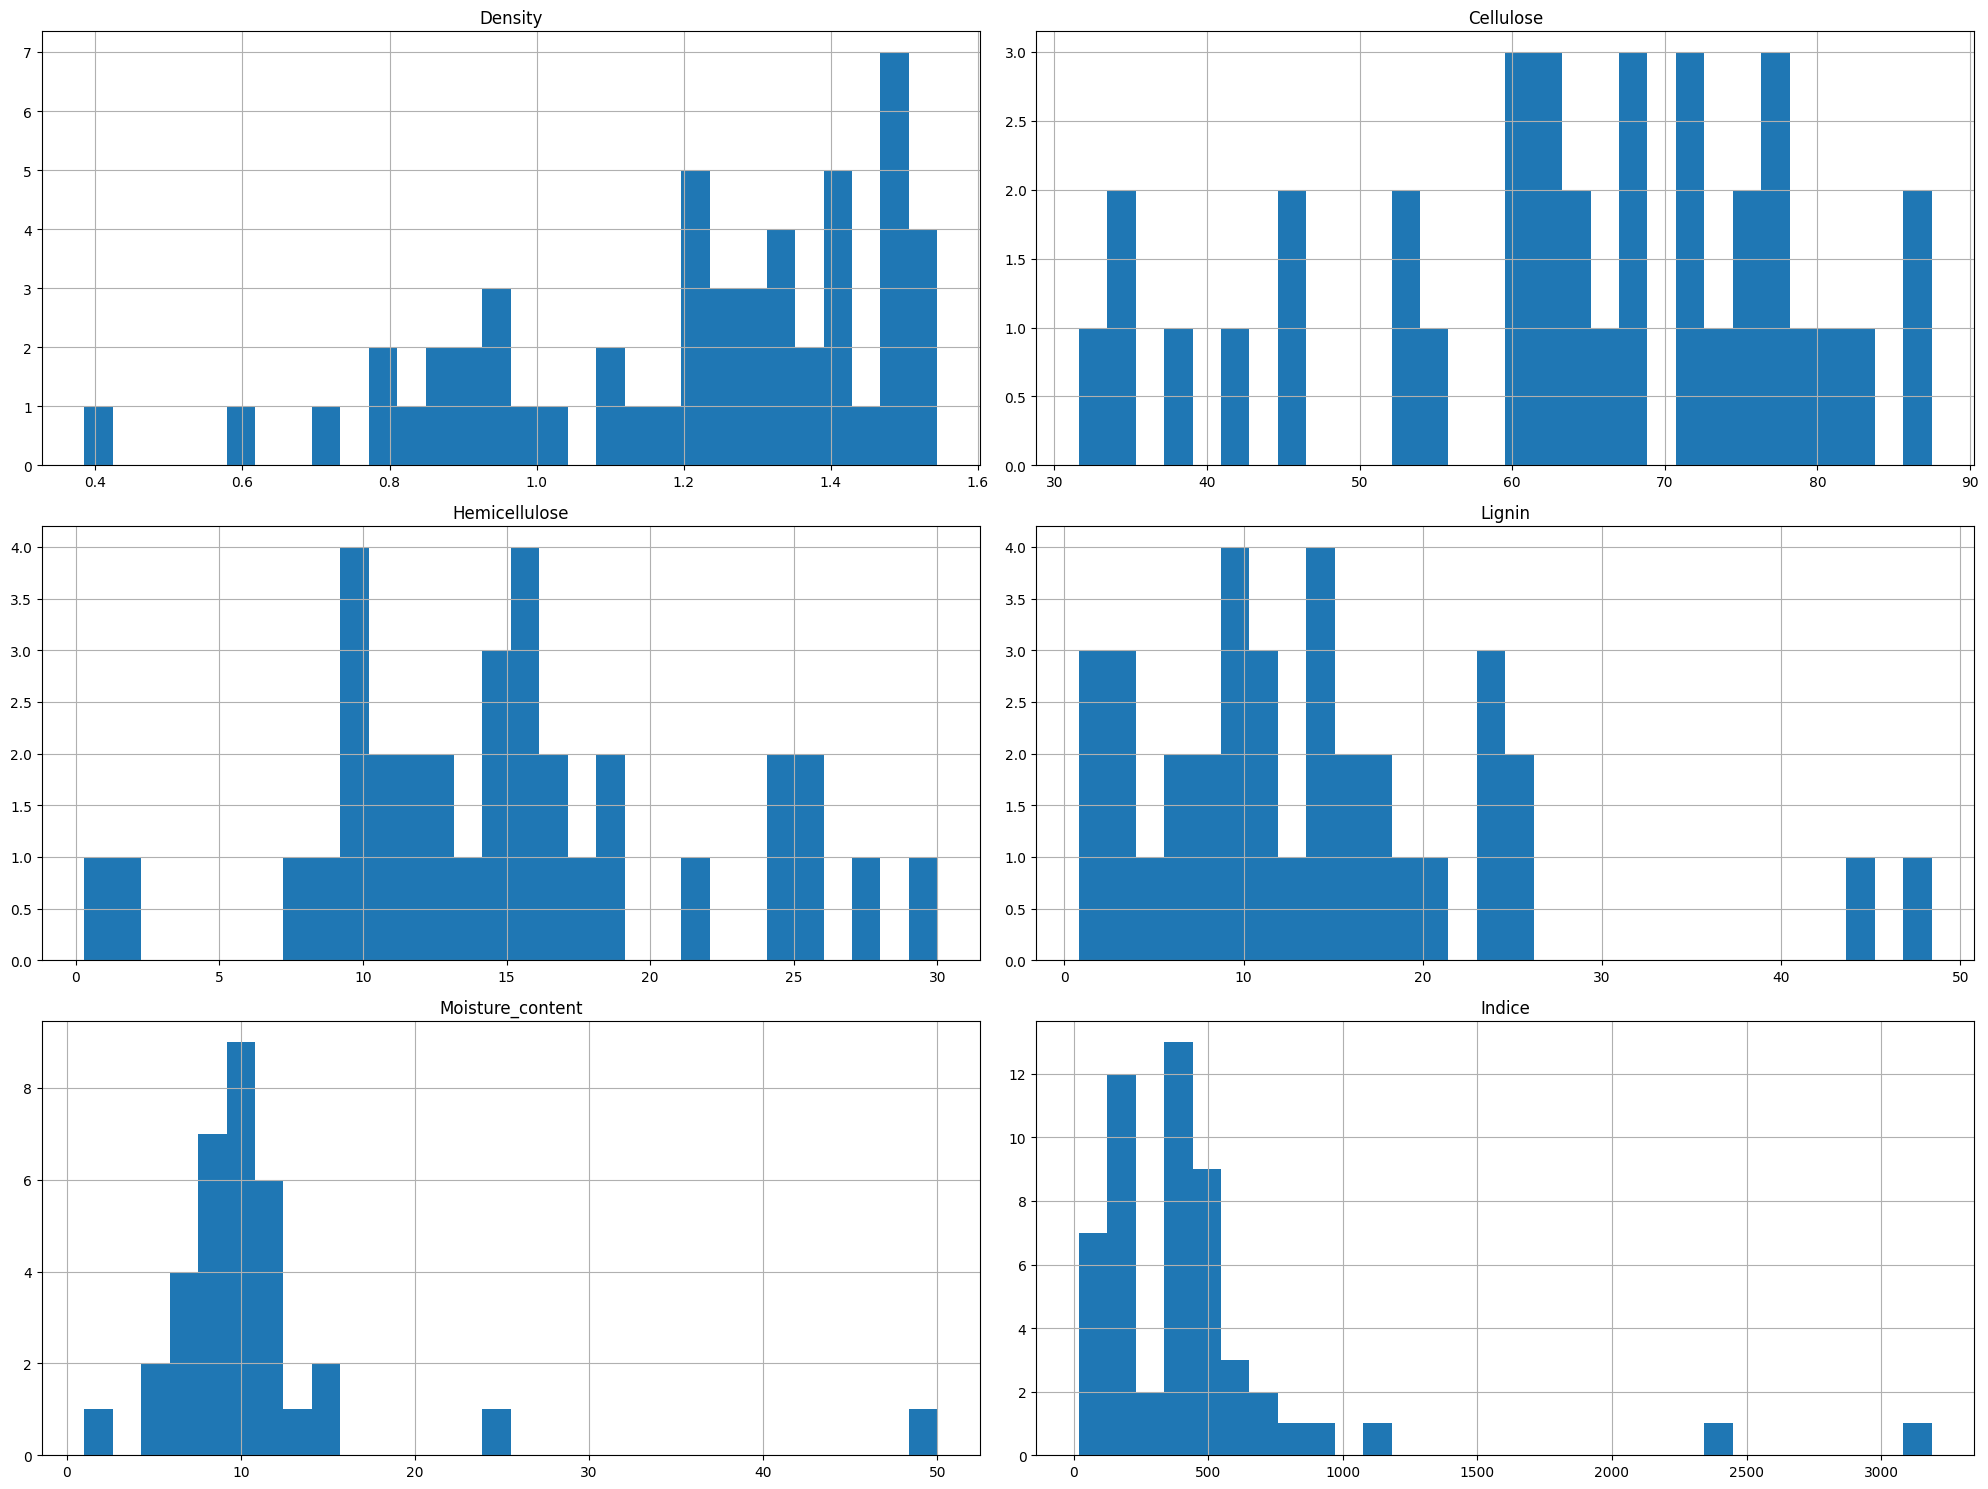

In [ ]:
df.hist(bins=30, figsize=(20,15))
plt.tight_layout()
plt.show()

In [15]:
# Handling missing values by filling with the median
df_filled = df.fillna(df.median(numeric_only=True))
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fiber             53 non-null     object 
 1   Density           53 non-null     float64
 2   Cellulose         53 non-null     float64
 3   Hemicellulose     53 non-null     float64
 4   Lignin            53 non-null     float64
 5   Moisture_content  53 non-null     float64
 6   Indice            53 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


## Encoding

In [16]:
df_encoded = pd.get_dummies(df_filled, columns=['Fiber'])
df_encoded.head()

,Density,Cellulose,Hemicellulose,Lignin,Moisture_content,Indice,Fiber_Abaca,Fiber_Baggase,Fiber_Bahia Piassava,Fiber_Bamboo,...,Fiber_Prosopis juliflora bark,Fiber_Ramie,Fiber_Ricinus communis plant,Fiber_Saharan aloevera,Fiber_Sida rhombifolia,Fiber_Sisal,Fiber_Sugar Palm,Fiber_Taliera Palm fruit (Corypha taliera fruit),Fiber_Tamarindus Indica L. (fruit fiber),Fiber_kenaf (bast)
0,1.220,82.73,7.96,11.270,6.60,3188.114754,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.510,77.17,11.02,10.450,7.30,2379.801325,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.145,72.84,11.00,15.380,6.35,1090.393013,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1.010,65.25,14.65,11.795,9.49,942.415842,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.778,68.35,11.46,12.320,5.43,801.439589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Define which columns should be encoded. In this case, let's encode all the numeric columns
columns_to_scale = ['Density', 'Cellulose', 'Hemicellulose', 'Lignin', 'Moisture_content', 'Indice']

# Instantiate the scaler
scaler = MinMaxScaler()

# Fit and transform the columns
df_scaled = df_encoded.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df_filled[columns_to_scale])

# Now, df_scaled contains the standardized values of the features
df_scaled.head()

,Density,Cellulose,Hemicellulose,Lignin,Moisture_content,Indice,Fiber_Abaca,Fiber_Baggase,Fiber_Bahia Piassava,Fiber_Bamboo,...,Fiber_Prosopis juliflora bark,Fiber_Ramie,Fiber_Ricinus communis plant,Fiber_Saharan aloevera,Fiber_Sida rhombifolia,Fiber_Sisal,Fiber_Sugar Palm,Fiber_Taliera Palm fruit (Corypha taliera fruit),Fiber_Tamarindus Indica L. (fruit fiber),Fiber_kenaf (bast)
0,0.719828,0.914669,0.257912,0.219958,0.114286,1.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.969828,0.815206,0.360943,0.202731,0.128571,0.744917,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.655172,0.737746,0.360269,0.306303,0.109184,0.338014,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.538793,0.601968,0.483165,0.230987,0.173265,0.291316,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.338793,0.657424,0.375758,0.242017,0.090408,0.246827,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Correlation analysis

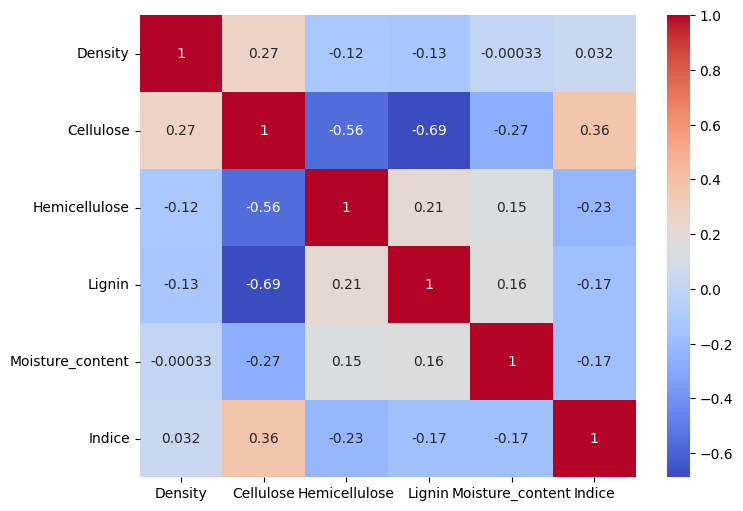

In [18]:
numerical_columns = ['Density', 'Cellulose', 'Hemicellulose', 'Lignin', 'Moisture_content', 'Indice']
correlation_matrix_numerical = df_scaled[numerical_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_numerical, annot=True, cmap='coolwarm')
plt.show()

In [19]:
# Split the data into train and test sets
X = df_scaled.drop('Indice', axis=1)
y = df_scaled['Indice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model selection

### 1- Linear Regression


In [20]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_lin_reg = linear_model.predict(X_test)
# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred_lin_reg)
mse = mean_squared_error(y_test, y_pred_lin_reg)
print(f'Mean Absolute Error: {mae}')
print(f"Mean Squared Error: {mse}")


Mean Absolute Error: 0.08081559828053562
Mean Squared Error: 0.009624772496169906


### 2- Random Forest Regressor

In [21]:
# Crear y ajustar el modelo Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular el error absoluto medio
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f"Mean Squared Error: {mse}")


Mean Absolute Error: 0.07064705992825382
Mean Squared Error: 0.00887929923602614


### 3- Tuned XGBoost Regressor

In [ ]:
# Create a XGBRegressor object
xgb = XGBRegressor(random_state=42)

# Define a grid of hyperparameters
parameters = {
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'booster': ['gbtree', 'gblinear', 'dart']
}

# Instantiate GridSearchCV
XGB_model = GridSearchCV(estimator=xgb, param_grid=parameters, cv=3, scoring='neg_mean_absolute_error', verbose=0, n_jobs=-1)

# Fit GridSearchCV to the training data
XGB_model.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters: ", XGB_model.best_params_)

# The best_estimator_ attribute gives a model with the best parameters
best_grid = XGB_model.best_estimator_

# Predict the probabilities on the test set
y_pred = best_grid.predict(X_test)

# Compute Mean Absolute Error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f"Mean Squared Error: {mse}")


[03:36:37] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth" } are not used.

Best Parameters:  {'booster': 'gblinear', 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 50}
Mean Absolute Error: 0.07049120642899574
Mean Squared Error: 0.00759379412175189


### 4- Tuned Gradient Boosting Regressor

In [ ]:
gbr = GradientBoostingRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400], # number of boosting stages to perform
    'max_depth': [3, 5, 10], # maximum depth of the individual regression estimators
    'learning_rate': [0.1, 0.01, 0.001], # learning rate shrinks the contribution of each tree
    'subsample': [0.5, 0.7, 1.0] # subsamples
}

# Initialize a GridSearchCV object that will find the best hyperparameters
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best parameters for Gradient Boosting: {best_params}')

# Replace your current GBR_model with the best one found
GBR_model = GradientBoostingRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], learning_rate=best_params['learning_rate'])

# Train the model
GBR_model.fit(X_train, y_train)

# Evaluate the model
predictions = GBR_model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')
print(f"Mean Squared Error: {mse}")

Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Mean Absolute Error: 0.06871813104217658
Mean Squared Error: 0.008662007692528785


### 5- Support Vector Regressor

In [22]:
# Define a grid of hyperparameters
parameters = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Create a SVR object
svr = SVR()

# Instantiate GridSearchCV
SVR_model = GridSearchCV(estimator=svr, param_grid=parameters, cv=3, scoring='neg_mean_absolute_error', verbose=0, n_jobs=-1)

# Fit GridSearchCV to the training data
SVR_model.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters: ", SVR_model.best_params_)

# Fit the model on the training data using the best parameters
best_grid = SVR_model.best_estimator_

# Predict the probabilities on the test set
y_pred = best_grid.predict(X_test)

# Compute Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f"Mean Squared Error: {mse}")

Best Parameters:  {'C': 1, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}
Mean Absolute Error: 0.06581446280125995
Mean Squared Error: 0.006782156221687083


## Cross Validation

In [ ]:
# List of models
models = [
    ('Linear Regression', linear_model),
    ('Random Forest', rf_model),
    ('XGBoost', XGB_model),
    ('Gradient Boosting', GBR_model),
    ('Support Vector', SVR_model)
]

# Reset the index of your DataFrame
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Evaluate each model with cross-validation
for name, model in models:
    mae_train = []
    mae_val = []
    mse_train = []
    mse_val = []
    cv = KFold(n_splits=5)

    for train_index, val_index in cv.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        model.fit(X_train_fold, y_train_fold)
        y_train_pred = model.predict(X_train_fold)
        y_val_pred = model.predict(X_val_fold)
        mae_train.append(mean_absolute_error(y_train_fold, y_train_pred))
        mae_val.append(mean_absolute_error(y_val_fold, y_val_pred))
        mse_train.append(mean_squared_error(y_train_fold, y_train_pred))
        mse_val.append(mean_squared_error(y_val_fold, y_val_pred))

    print(f'{name}')
    print(f'Training MAE for each fold: {mae_train}')
    print(f'Validation MAE for each fold: {mae_val}')
    print(f'Average training MAE: {np.mean(mae_train)}')
    print(f'Average validation MAE: {np.mean(mae_val)}')
    print(f'Training MSE for each fold: {mse_train}')
    print(f'Validation MSE for each fold: {mse_val}')
    print(f'Average training MSE: {np.mean(mse_train)}')
    print(f'Average validation MSE: {np.mean(mse_val)}')
    print('-' * 80)

Linear Regression
Training MAE for each fold: [1.1060176343803643e-16, 1.1606877075626636e-16, 2.1122809383952887e-16, 1.4979847427846782e-16, 1.5877821933058305e-16]
Validation MAE for each fold: [0.07751100098867061, 0.16697593683743933, 0.1570966268573506, 0.0648953790266776, 0.09231125699926229]
Average training MAE: 1.4929506432857653e-16
Average validation MAE: 0.1117580401418801
Training MSE for each fold: [1.8734045822675838e-32, 2.1237754750379245e-32, 8.159003951902249e-32, 3.9750627602168906e-32, 3.994038834668941e-32]
Validation MSE for each fold: [0.008304507538650138, 0.09599972138378907, 0.058523936017736866, 0.006006492295736434, 0.011121531408377034]
Average training MSE: 4.0250571208187175e-32
Average validation MSE: 0.035991237728857914
--------------------------------------------------------------------------------
Random Forest
Training MAE for each fold: [0.0363719847190088, 0.02803461451754041, 0.031880179845969456, 0.035948437670679526, 0.03834031881496862]
Vali

## Predictions with Support Vector

In [23]:
# Predict on the test set
y_pred = best_grid.predict(X_test)

# Fetch fiber names from the original data
fiber_names_test = df_filled.loc[X_test.index, 'Fiber']

# Define the properties to include in the output
properties = ['Density', 'Cellulose', 'Hemicellulose', 'Lignin', 'Moisture_content', 'Indice']

# Fetch these properties from the original data
properties_test = df_filled.loc[X_test.index, properties]

# Create a DataFrame to display the results
results_with_fiber = pd.DataFrame({
    'Fiber_Name': fiber_names_test
})

# Add the properties to the results DataFrame
results_with_fiber[properties] = properties_test

# Add the results
results_with_fiber['Actual Value'] = y_test
results_with_fiber['Predicted Value'] = y_pred

# Display the DataFrame
results_with_fiber

,Fiber_Name,Density,Cellulose,Hemicellulose,Lignin,Moisture_content,Indice,Actual Value,Predicted Value
19,Nettle,1.5100,86.00,10.000,6.450,11.00,430.463576,0.129757,0.127391
41,Junco (Juncus effusus L.),0.3850,40.99,27.840,18.540,9.49,177.922078,0.050062,0.076426
47,Caña brava o caña flecha (Gynerium sagittatum),1.5000,38.95,24.150,24.185,8.88,112.153333,0.029307,0.076759
12,Bamboo,0.9750,34.50,30.000,26.000,14.50,512.820513,0.155747,0.067163
43,Chocha (Yucca treculeana),1.3300,65.25,14.650,11.795,9.49,166.917293,0.046589,0.105874
5,Dracaena cylindrica (Sansevieria cylindrica),0.9150,79.70,10.130,3.800,6.08,735.650273,0.226066,0.122040
17,kenaf (bast),1.3000,46.07,17.915,13.590,9.10,459.615385,0.138957,0.089129
50,Palmira Palm (Borassus),1.5000,65.25,14.650,11.795,9.49,43.466667,0.007631,0.107064
3,Cyperus Dichrostachus A.Rich,1.0100,65.25,14.650,11.795,9.49,942.415842,0.291316,0.103659
32,Ricinus communis plant,1.1800,65.50,14.650,5.560,10.17,301.694915,0.089121,0.110093
